In [1]:
# --- Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- Load Dataset ---
df = pd.read_csv('AirQuality.csv', sep=';')

In [4]:
# --- Initial Exploration ---
print("\n--- Sample Rows ---")
print(df.head())

print("\n--- Column Names ---")
print(df.columns)

print("\n--- Dataset Info ---")
df.info()

print("\n--- Shape ---")
print(df.shape)

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isna().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())


--- Sample Rows ---
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16

In [5]:
# --- Data Cleaning ---
df = df.iloc[:, :-2]
df.replace(to_replace=',', value='.', regex=True, inplace=True)

columns_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.replace(-200, np.nan, inplace=True)
df.info()

df.drop('NMHC(GT)', axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.time
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Date       CO(GT)  PT08.S1(CO)     C6H6(GT)  \
count                           9357  7674.000000  8991.000000  8991.000000   
mean   2004-09-21 04:30:05.193972480     2.152750  1099.833166    10.083105   
min              2004-03-10 00:00:00     0.100000   647.000000     0.100000   
25%              2004-06-16 00:00:00     1.100000   937.000000     4.400000   
50%              2004-09-21 00:00:00     1.800000  1063.000000     8.200000   
75%              2004-12-28 00:00:00     2.900000  1231.000000    14.000000   
max              2005-04-04 00:00:00    11.900000  2040.000000    63.700000   
std                              NaN     1.453252   217.080037     7.449820   

       PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
count    8991.000000  7718.000000   8991.000000  7715.000000   8991.000000   
mean      939.153376   246.896735    835.493605   113.091251   1456.264598   
min       383.000000     2.000000    322.000000     2.000000    551.000000   
25%       734.500000    98.000000    658.000000    78.000000   1227.000000   
50%       909.000000   180.000000    806.000000   109.000000   1463.000000   
75%      1116.000000   326.000000    969.500000   142.000000   1674.000000   
max      2214.000000  1479.000000   2683.000000   340.000000   2775.000000   
std       266.831429   212.979168    256.817320    48.370108    346.206794   

       PT08.S5(O3)            T           RH           AH  
count  8991.000000  8991.000000  8991.000000  8991.000000  
mean   1022.906128    18.317829    49.234201     1.025530  
min     221.000000    -1.900000     9.200000     0.184700  
25%     731.500000    11.800000    35.800000     0.736800  
50%     963.000000    17.800000    49.600000     0.995400  
75%    1273.500000    24.400000    62.500000     1.313700  
max    2523.000000    44.600000    88.700000     2.231000  
std     398.484288     8.832116    17.316892     0.403813

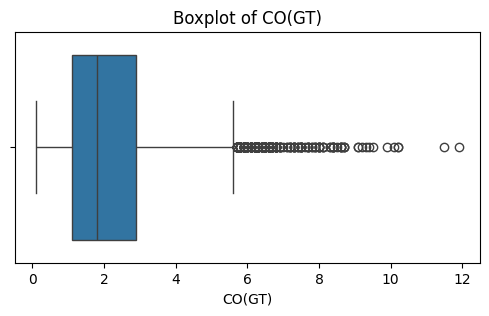

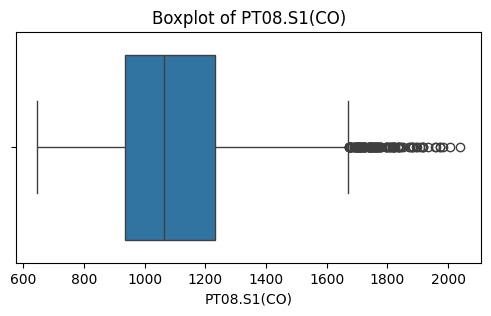

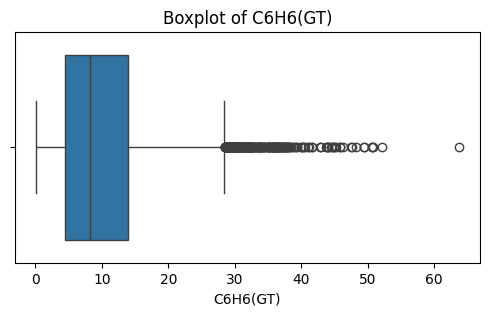

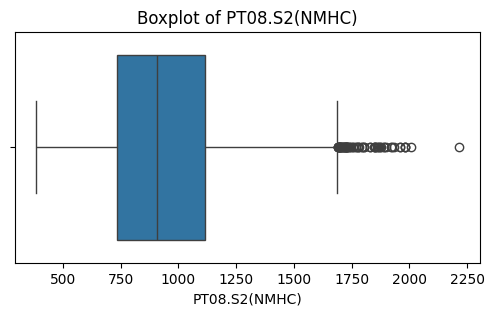

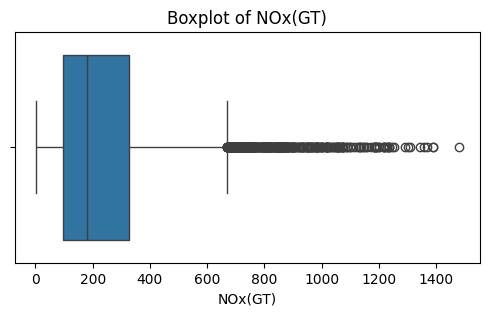

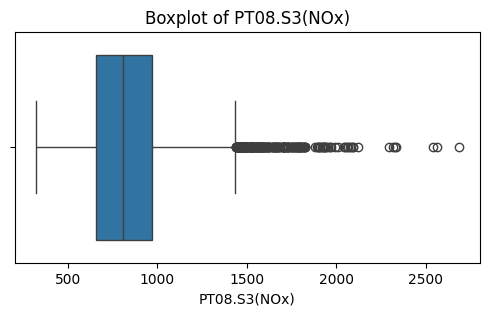

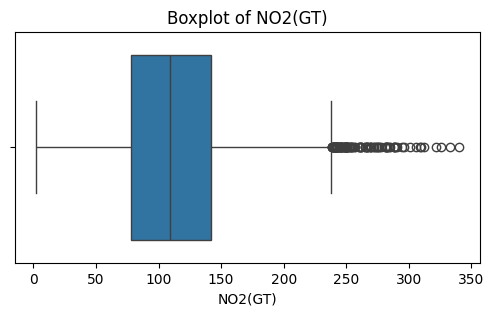

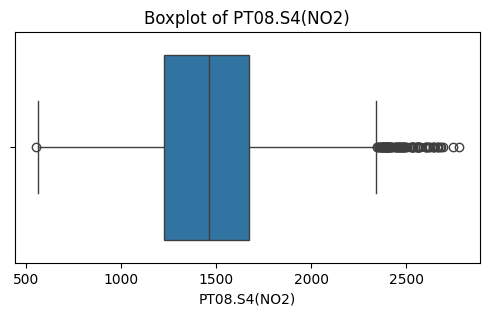

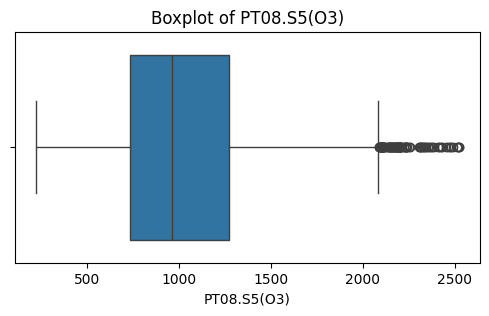

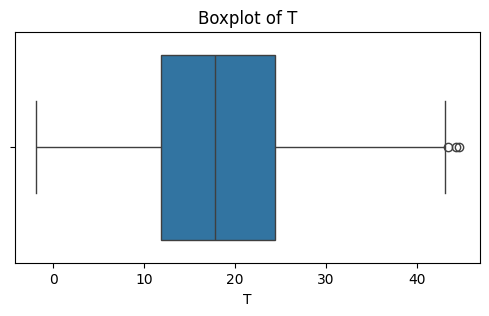

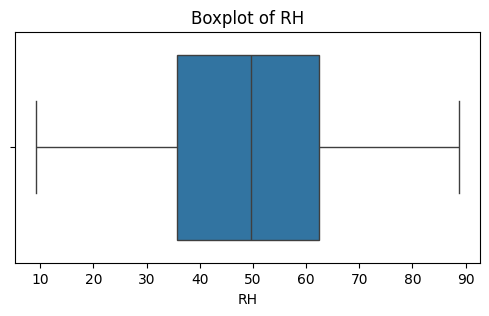

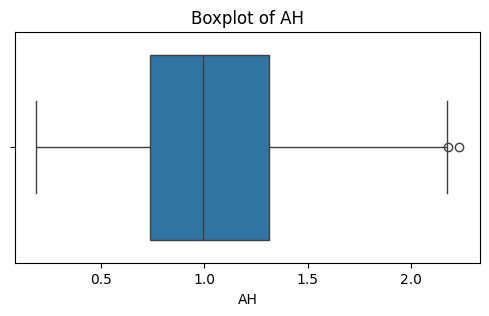

In [6]:
# --- Box Plots for Numeric Columns ---
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

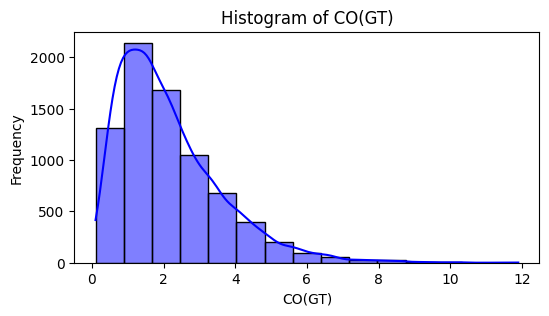

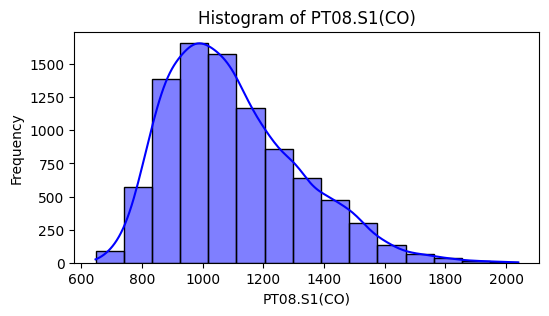

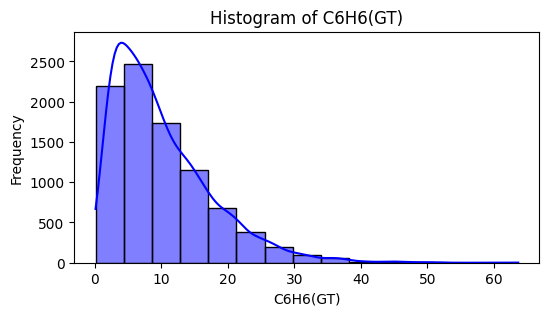

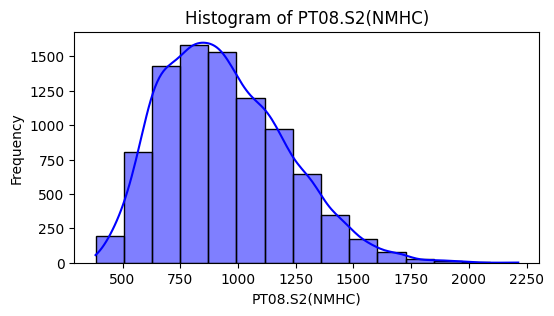

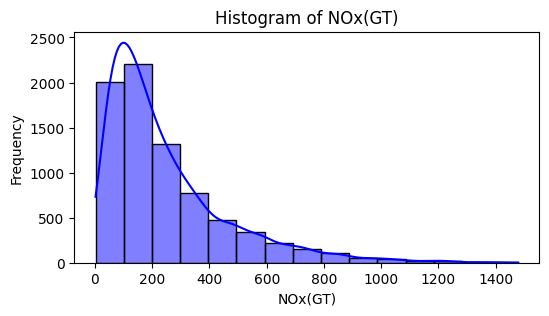

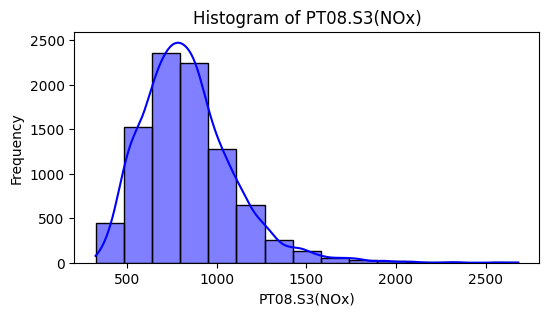

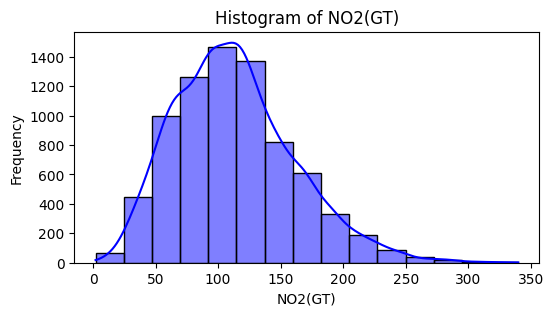

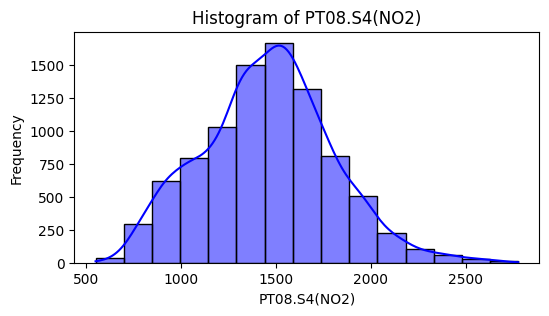

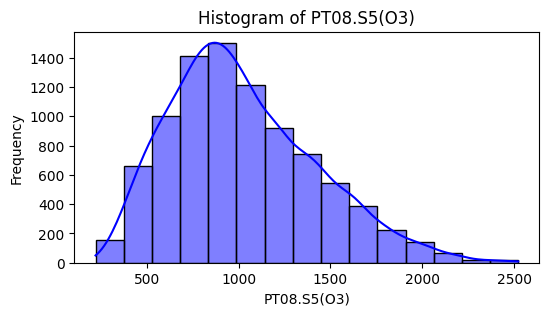

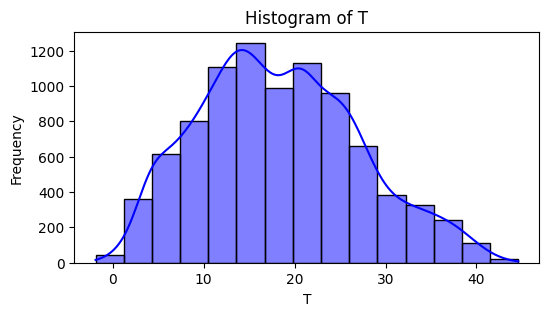

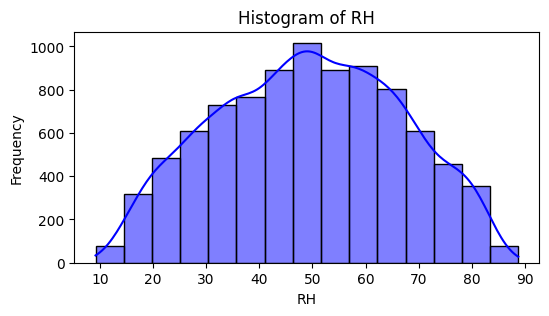

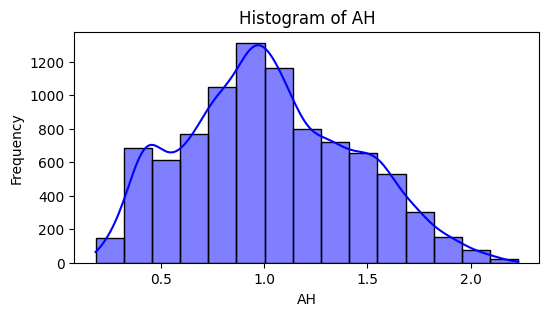

In [7]:

# --- Histograms for Numeric Columns ---
for column in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(x=df[column], stat="count", color="blue", bins=15, kde={'alpha': 0.5})
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

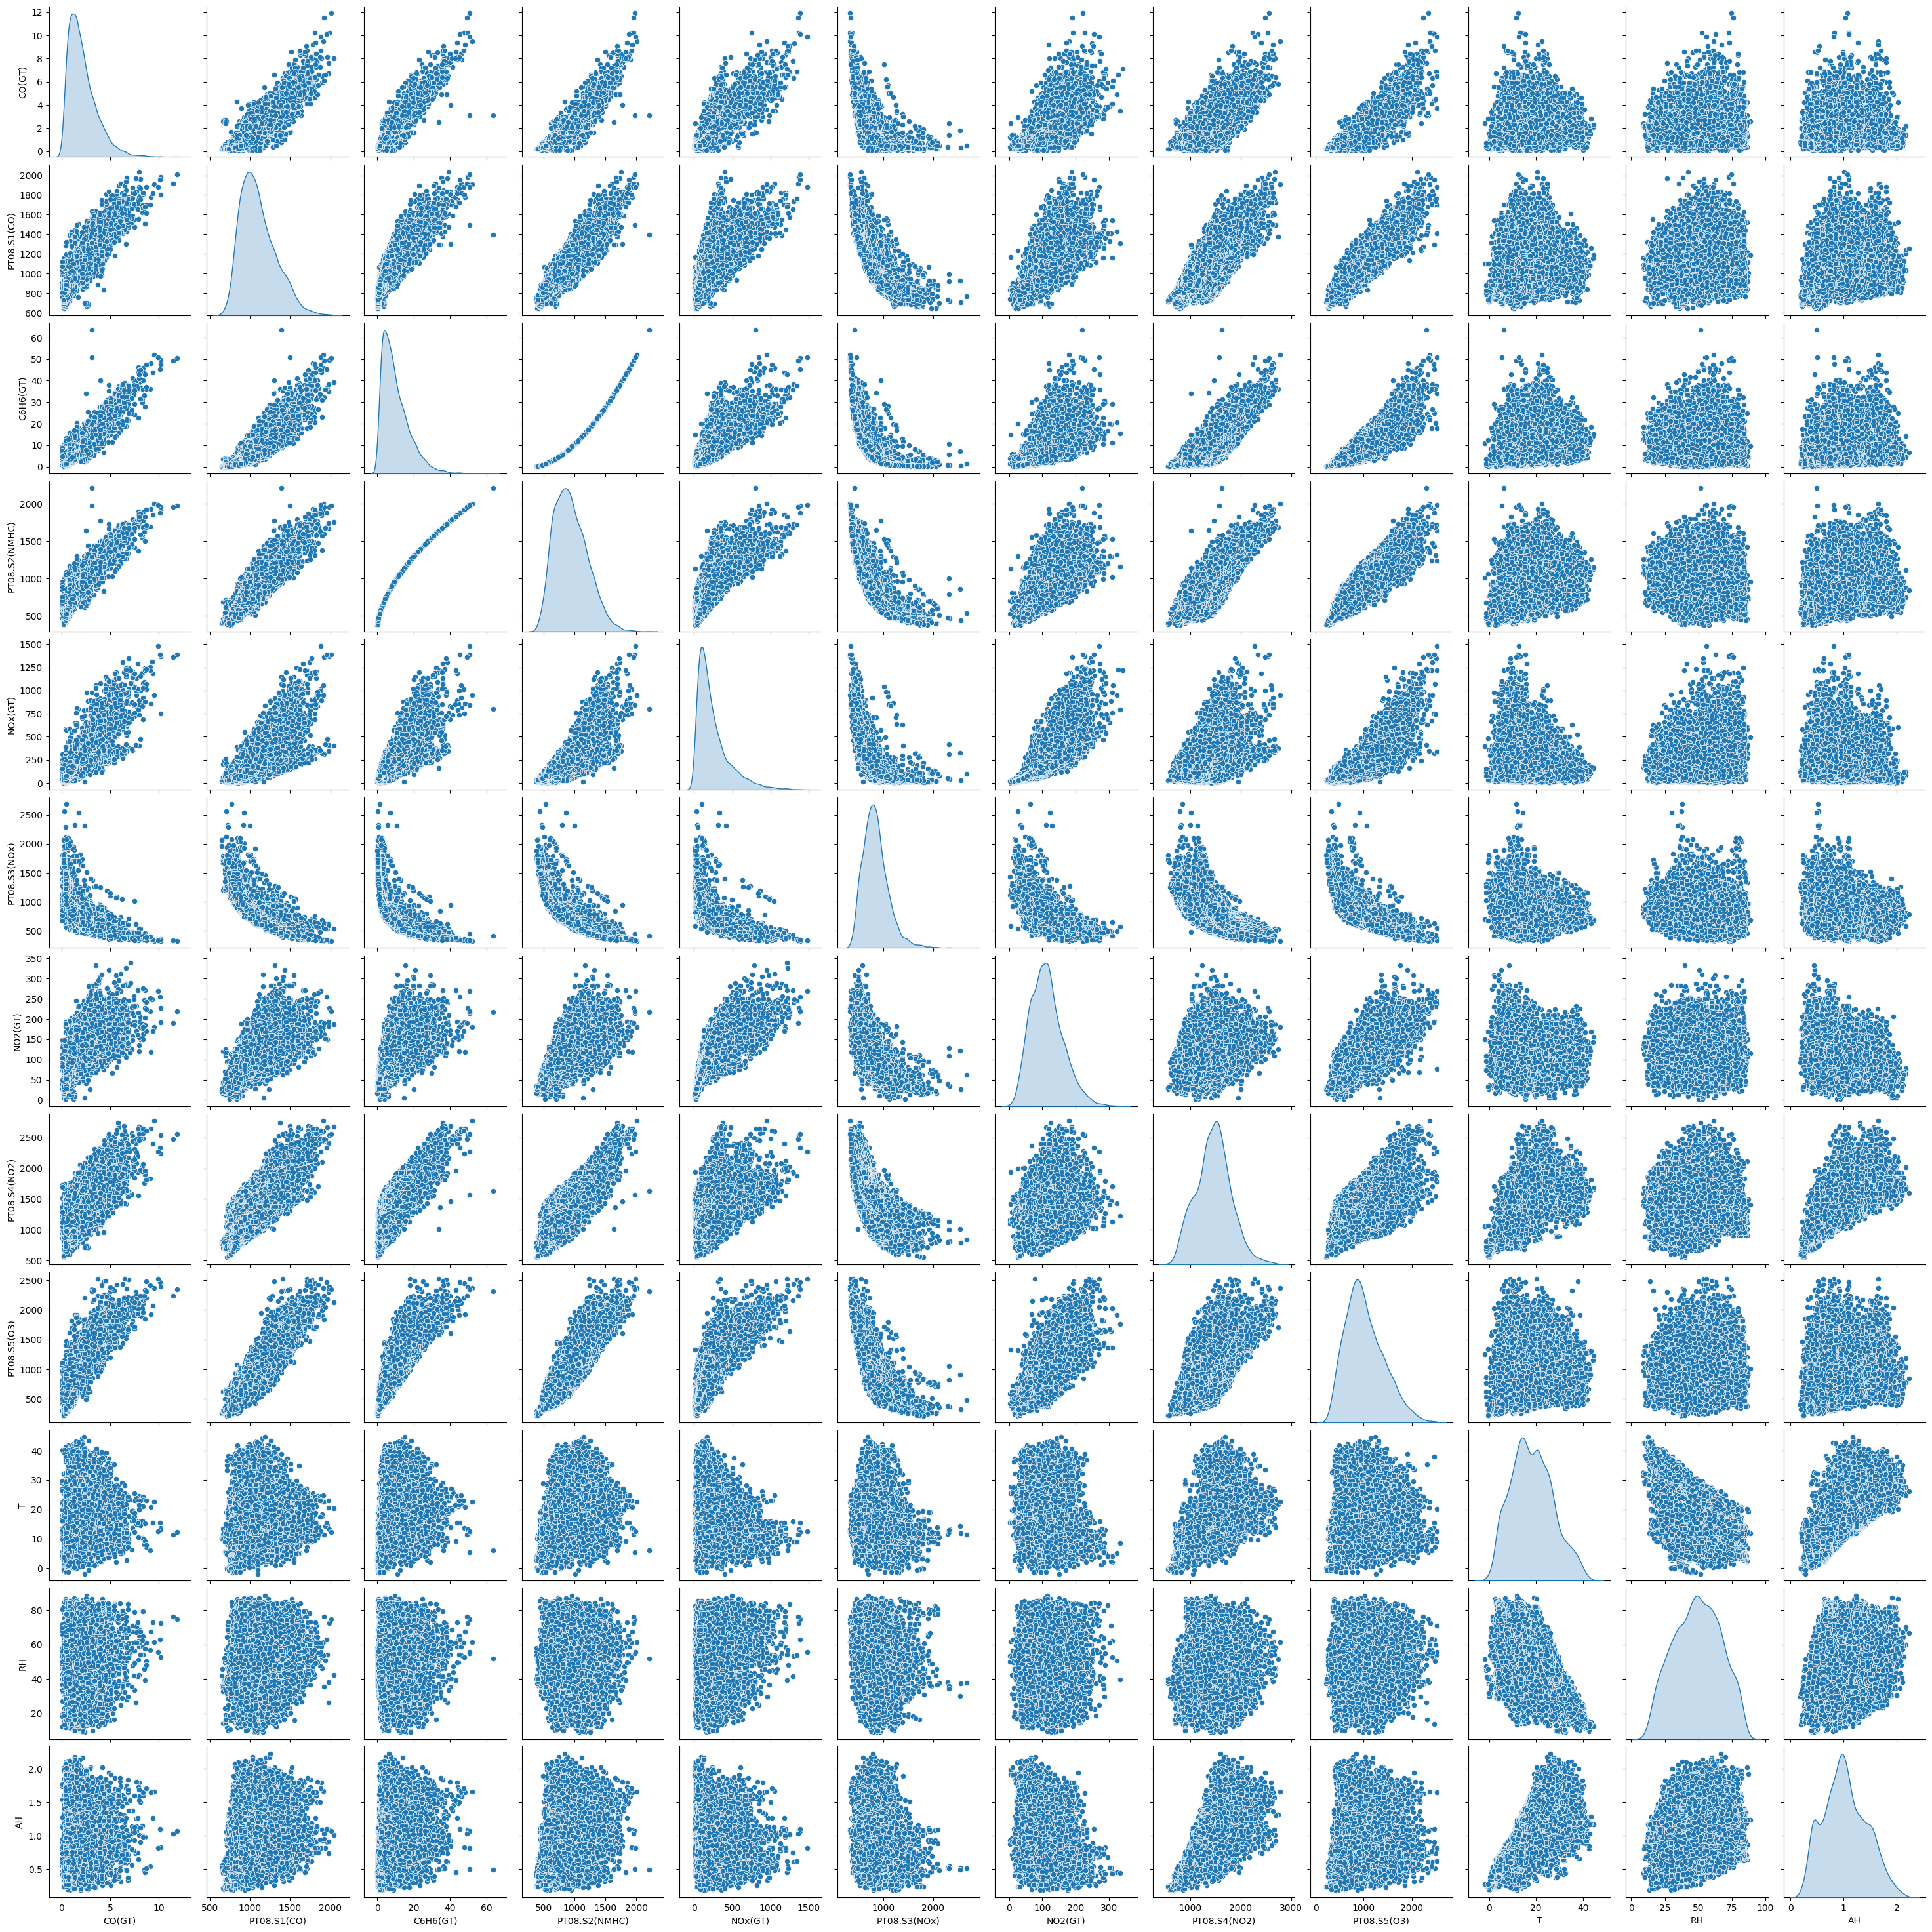

In [8]:
# --- Pair Plot ---
sns.pairplot(df, diag_kind='kde')
plt.show()

In [9]:
# --- Missing Value Analysis ---
df.isnull().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [10]:

# FIX 1: Avoid FutureWarning for interpolation
df = df.infer_objects(copy=False)

In [11]:
# --- Interpolation ---
df = df.apply(lambda column: column.interpolate(method="linear")
              if column.dtype != 'datetime64[ns]' and column.dtype != '<m8[ns]'
              else column)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9471 non-null   float64       
 3   PT08.S1(CO)    9471 non-null   float64       
 4   C6H6(GT)       9471 non-null   float64       
 5   PT08.S2(NMHC)  9471 non-null   float64       
 6   NOx(GT)        9471 non-null   float64       
 7   PT08.S3(NOx)   9471 non-null   float64       
 8   NO2(GT)        9471 non-null   float64       
 9   PT08.S4(NO2)   9471 non-null   float64       
 10  PT08.S5(O3)    9471 non-null   float64       
 11  T              9471 non-null   float64       
 12  RH             9471 non-null   float64       
 13  AH             9471 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.0+ MB


C:\Users\HP\AppData\Local\Temp\ipykernel_11616\2687020073.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.apply(lambda column: column.interpolate(method="linear")


Date             114
Time             114
CO(GT)             0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64

In [12]:
# FIX 2: Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

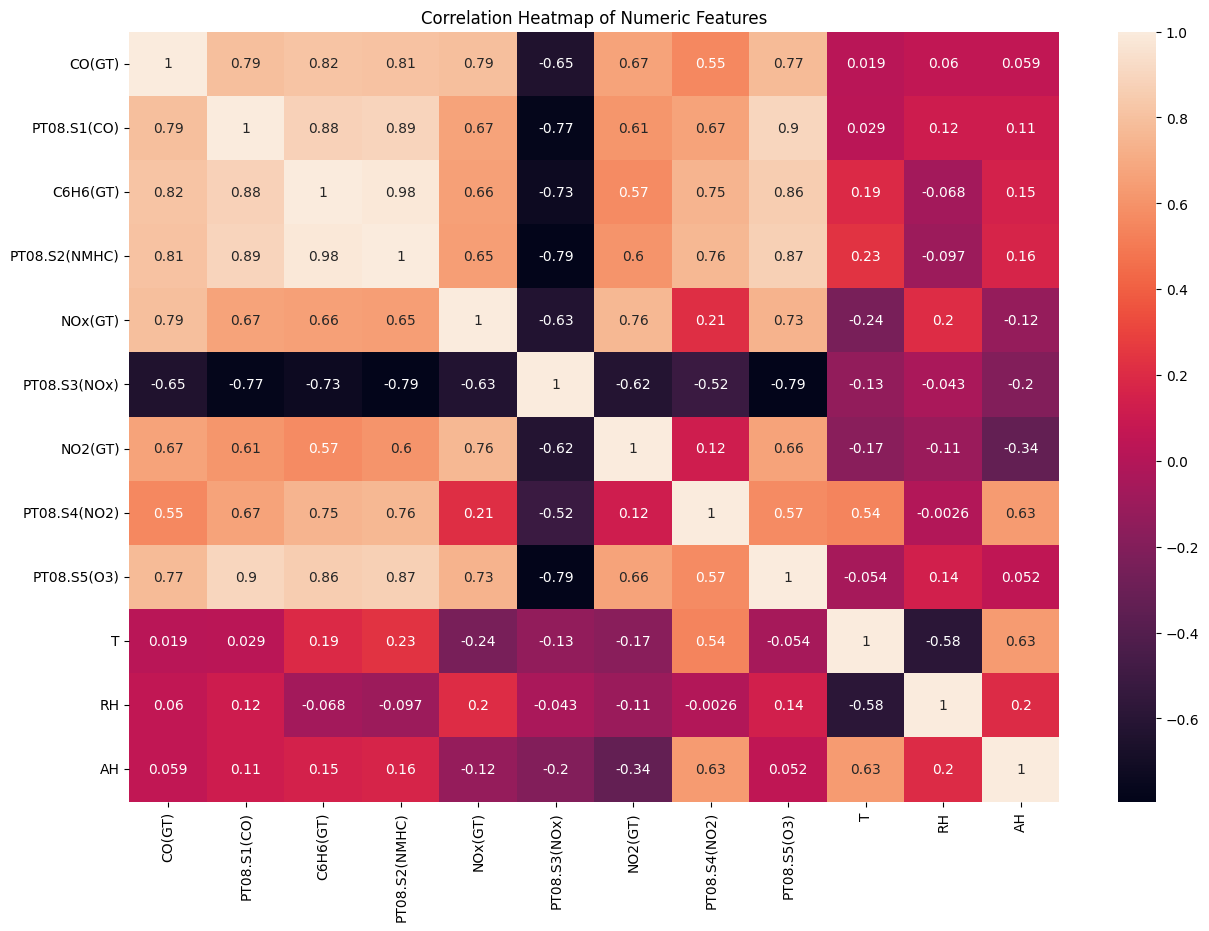

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [13]:
# --- Correlation Heatmap ---
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(method='pearson', min_periods=1), annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

df.columns
df.isna().sum()

df = df.dropna()
df.isna().sum()


In [14]:
# --- Combine Date and Time into Datetime ---
df['Datetime'] = df.apply(lambda row: pd.to_datetime(str(row['Date']) + ' ' + str(row['Time'])), axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
 14  Datetime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2), floa

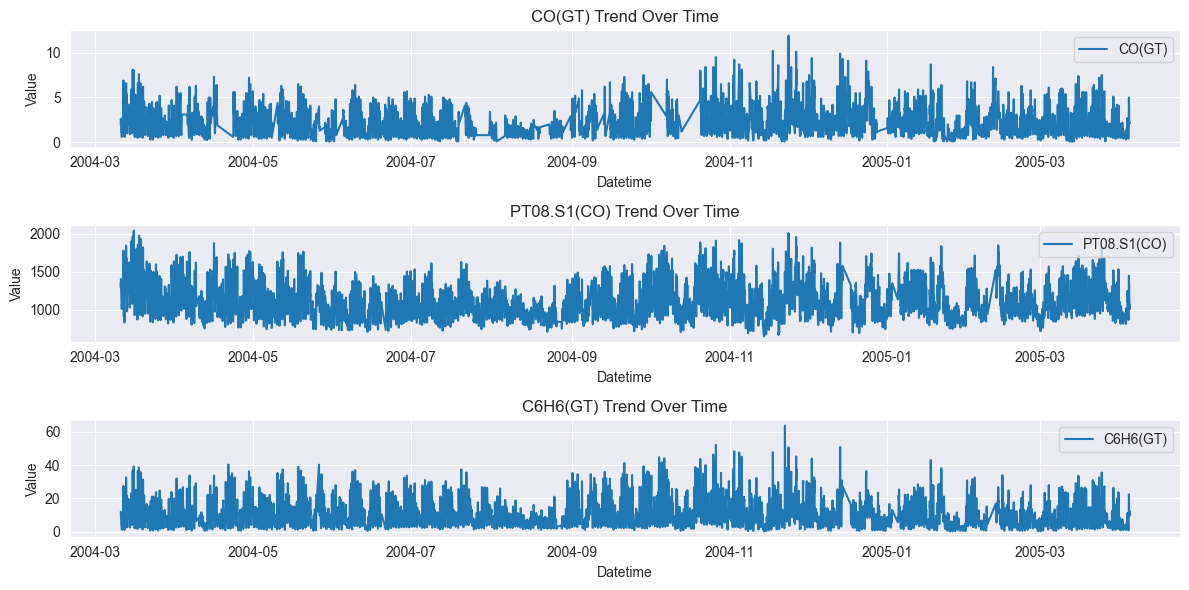

In [15]:
# --- Line Plots for Pollutants ---
pollutants = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)']
df_pollutants = df[['Datetime'] + pollutants]
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    plt.plot(df_pollutants['Datetime'], df_pollutants[pollutant], label=pollutant)
    plt.xlabel('Datetime')
    plt.ylabel('Value')
    plt.title(f'{pollutant} Trend Over Time')
    plt.legend()

plt.tight_layout()
plt.show()

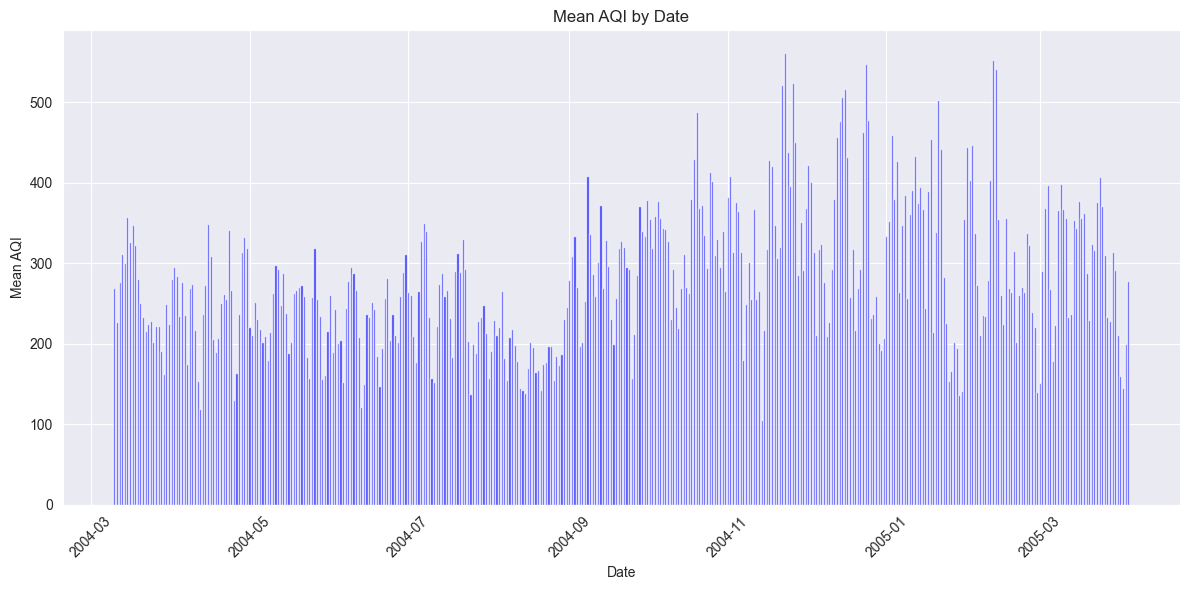

In [16]:
# --- Mean AQI Bar Plot ---
df['AQI'] = (df['CO(GT)'] + df['C6H6(GT)'] + df['NOx(GT)'] +
             df['NO2(GT)'] + df['PT08.S5(O3)']) / 5
df_aqi_by_date = df.groupby('Date')['AQI'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
plt.bar(df_aqi_by_date['Date'], df_aqi_by_date['AQI'], color='b', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Mean AQI')
plt.title('Mean AQI by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

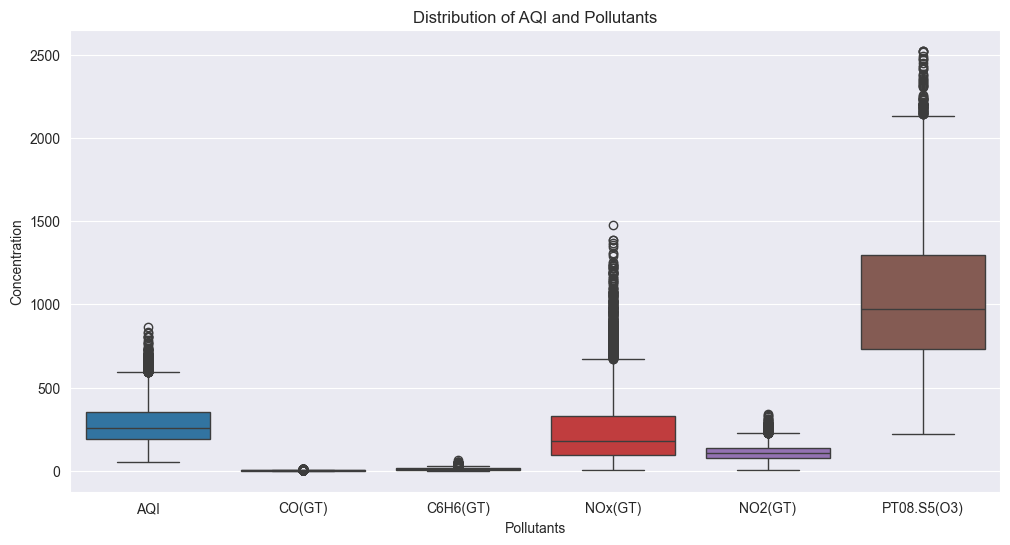

In [17]:
# --- Box Plot: AQI vs Pollutants ---
df['AQI'] = (df['CO(GT)'] + df['C6H6(GT)'] + df['NOx(GT)'] +
             df['NO2(GT)'] + df['PT08.S5(O3)']) / 5
pollutant_categories = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)']
df_plot = df[['AQI'] + pollutant_categories]

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.boxplot(data=df_plot)
plt.title('Distribution of AQI and Pollutants')
plt.xlabel('Pollutants')
plt.ylabel('Concentration')
plt.show()
